In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (6, 6)
plt.style.use('fivethirtyeight')

In [30]:
df_e = pd.read_csv('../output/oof_solution_4th_sub.csv').rename(columns={'yhat': 'E'})
del df_e['Field_Location']

df_g_ad = pd.read_csv('../output/oof_genetic_AD.csv').rename(columns={'ypred': 'G (A+D)'})
del df_g_ad['ytrue']

df_gxe_a = pd.read_csv('../output/oof_kronecker_additive.csv').rename(columns={'ypred': 'GxE (A)'})
del df_gxe_a['ytrue']

df_gxe_d = pd.read_csv('../output/oof_kronecker_dominant.csv').rename(columns={'ypred': 'GxE (D)'})
del df_gxe_d['ytrue']

df_gxe_epi_aa = pd.read_csv('../output/oof_kronecker_epi_AA.csv').rename(columns={'ypred': 'GxE (epi AA)'})
del df_gxe_epi_aa['ytrue']

df_gxe_epi_dd = pd.read_csv('../output/oof_kronecker_epi_DD.csv').rename(columns={'ypred': 'GxE (epi DD)'})
del df_gxe_epi_dd['ytrue']

df_gxe_epi_ad = pd.read_csv('../output/oof_kronecker_epi_AD.csv').rename(columns={'ypred': 'GxE (epi AD)'})
del df_gxe_epi_ad['ytrue']

df_gxe_epi_all = pd.read_csv('../output/oof_kronecker_epi_all.csv').rename(columns={'ypred': 'GxE (epi all)'})
del df_gxe_epi_all['ytrue']

# merge different models
df = (
    df_e
    .merge(df_g_ad, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_a, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_d, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_epi_aa, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_epi_dd, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_epi_ad, on=['Env', 'Hybrid'], how='inner')
    .merge(df_gxe_epi_all, on=['Env', 'Hybrid'], how='inner')
    .reset_index(drop=True)
)
df['Env'] = df['Env'].str[:-5]
df

,Env,Hybrid,ytrue,E,G (A+D),GxE (A),GxE (D),GxE (epi AA),GxE (epi DD),GxE (epi AD),GxE (epi all)
0,COH1,B73/MO17,9.378745,10.074240,8.072191,7.512070,9.488947,8.552509,8.876393,8.716067,8.086589
1,COH1,B73/PHK76,11.771606,10.074240,8.292856,7.700906,10.112860,7.948522,8.840268,7.540311,7.962150
2,COH1,B73/PHN82,12.143661,10.074240,8.786522,8.456964,10.375880,8.576704,9.406544,8.971313,8.374179
3,COH1,B73/PHZ51,8.882044,10.074240,8.477164,7.366896,9.125400,8.957580,9.046856,9.207403,8.677708
4,COH1,LH145/LH82,10.747551,10.074240,6.680055,6.564207,8.514244,7.111676,8.167655,7.889639,6.292205
...,...,...,...,...,...,...,...,...,...,...,...
13591,WIH3,W10004_1123/PHP02,5.920247,10.552957,8.130803,8.802133,8.232965,9.138272,8.092687,7.139128,8.366854
13592,WIH3,W10004_1140/PHP02,10.620917,10.552957,10.285709,9.647219,10.102000,9.697660,9.613683,8.857175,9.525186
13593,WIH3,W10004_1143/PHP02,11.209678,10.552957,9.588413,9.769423,10.235621,9.410597,9.123363,8.697596,9.368681
13594,WIH3,W10004_1146/PHP02,8.657545,10.552957,9.840187,8.732344,9.803005,9.546341,9.361129,9.000433,9.535696


In [31]:
rmse_e = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['E'], squared=False)
).mean()
print('RMSE (E):', rmse_e)

rmse_g_ad = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['G (A+D)'], squared=False)
).mean()
print('RMSE (G (A+D)):', rmse_g_ad)

rmse_gxe_a = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (A)'], squared=False)
).mean()
print('RMSE (GxE (A)):', rmse_gxe_a)

rmse_gxe_d = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (D)'], squared=False)
).mean()
print('RMSE (GxE (D)):', rmse_gxe_d)

rmse_gxe_epi_aa = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (epi AA)'], squared=False)
).mean()
print('RMSE (GxE (epi AA)):', rmse_gxe_epi_aa)

rmse_gxe_epi_dd = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (epi DD)'], squared=False)
).mean()
print('RMSE (GxE (epi DD)):', rmse_gxe_epi_dd)

rmse_gxe_epi_ad = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (epi AD)'], squared=False)
).mean()
print('RMSE (GxE (epi AD)):', rmse_gxe_epi_ad)

rmse_gxe_epi_all = df.groupby('Env').apply(
    lambda x: mean_squared_error(x['ytrue'], x['GxE (epi all)'], squared=False)
).mean()
print('RMSE (GxE (epi all)):', rmse_gxe_epi_all)

RMSE (E): 2.1333648354558377
RMSE (G (A+D)): 2.148467711450193
RMSE (GxE (A)): 2.1906655367412293
RMSE (GxE (D)): 2.13743364476794
RMSE (GxE (epi AA)): 2.137007127172509
RMSE (GxE (epi DD)): 2.17549532600143
RMSE (GxE (epi AD)): 2.169947172556496
RMSE (GxE (epi all)): 2.1775886009253598


In [32]:
rmse_per_env = pd.concat([
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['E'], squared=False)).rename('E'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['G (A+D)'], squared=False)).rename('G (A+D)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (A)'], squared=False)).rename('GxE (A)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (D)'], squared=False)).rename('GxE (D)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (epi AA)'], squared=False)).rename('GxE (epi AA)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (epi DD)'], squared=False)).rename('GxE (epi DD)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (epi AD)'], squared=False)).rename('GxE (epi AD)'),
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['GxE (epi all)'], squared=False)).rename('GxE (epi all)')
], axis=1)
# rmse_per_env['diff_model1_model3'] = rmse_per_env['model1'] - rmse_per_env['model3']
rmse_per_env.style.background_gradient(axis=None)

,E,G (A+D),GxE (A),GxE (D),GxE (epi AA),GxE (epi DD),GxE (epi AD),GxE (epi all)
Env,,,,,,,,
COH1,1.676631,3.382978,3.569341,2.270591,3.140941,2.542274,2.849106,3.409433
DEH1,2.199663,1.720770,2.021064,2.238171,1.983771,1.953310,1.871763,1.957973
GAH1,1.612953,2.115240,2.155276,1.925755,1.792483,1.982108,1.952975,2.072957
GAH2,2.546519,2.246141,2.258557,2.358274,2.193423,2.304125,2.270789,2.414603
GEH1,2.438730,2.246453,2.282111,2.296007,2.172410,2.284565,2.251847,2.166506
IAH1,2.247202,2.261280,2.359202,2.378701,2.321187,2.166785,2.215334,2.264090
IAH2,1.400147,1.344466,1.357010,1.318563,1.312160,1.437254,1.280311,1.275039
IAH3,2.116683,1.965678,2.043989,2.006136,2.029762,1.985043,1.997049,2.027874
IAH4,1.644620,1.381410,1.667005,1.515970,1.639407,1.450592,1.526038,1.481481


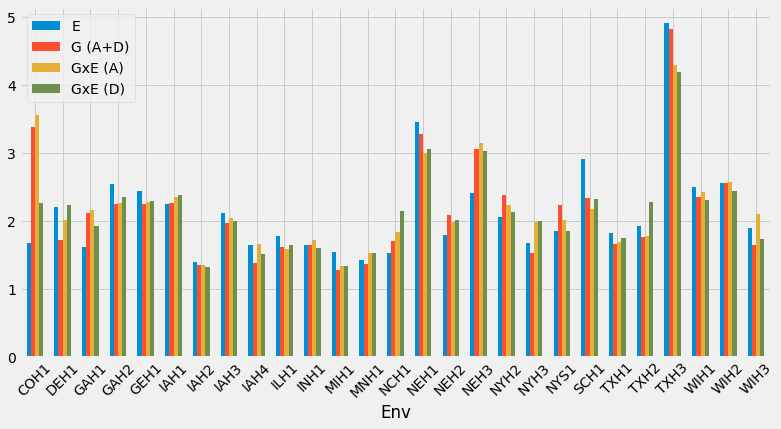

In [33]:
(
    rmse_per_env[[
        'E', 
        'G (A+D)',
        'GxE (A)', 
        'GxE (D)', 
#         'GxE (epi AA)', 
#         'GxE (epi DD)', 
#         'GxE (epi AD)',
#         'GxE (epi all)'
    ]]
    .plot.bar(figsize=(12, 6), width=0.6, align='center')
)
# plt.axhline(y=rmse_e, linestyle='--', linewidth=2)
# plt.axhline(y=rmse_gxe_a, linestyle='--', linewidth=2)
# plt.axhline(y=rmse_gxe_d, linestyle='--', linewidth=2)
# plt.axhline(y=rmse_gxe_epi_aa, linestyle='--', linewidth=2)
plt.xticks(rotation=45);

In [34]:
# (
#     rmse_per_env['diff_model1_model3'].
#     plot.bar(figsize=(12, 6), color=(rmse_per_env['diff_model1_model3'] > 0).map({True: 'g', False: 'r'}))
# )
# plt.xticks(rotation=45)
# plt.title('Difference in RMSE between model 1 and model 3, per location');

### Blending

In [35]:
# rmses = []
# w1s = []
# for w1 in np.linspace(0, 1, 1000):
#     w2 = 1 - w1
#     rmse_blend = df.groupby('Env').apply(
#         lambda x: mean_squared_error(
#             x['ytrue'], 
#             np.average([x['E'], x['GxE (epi AA)']], weights=[w1, w2], axis=0),
#             squared=False
#         )
#     ).mean()
#     rmses.append(rmse_blend)
#     w1s.append(w1)
    
# df_blend = pd.DataFrame()
# df_blend['rmse'] = rmses
# df_blend['w1'] = w1s

# best_blend = df_blend[df_blend['rmse'] == df_blend['rmse'].min()]
# best_w1 = float(best_ws['w1'])
# plt.plot(df_blend['w1'], df_blend['rmse'])
# plt.title(f"Best RMSE: {df_blend['rmse'].min():.4f}\nw1 = {best_w1:.4f}")
# plt.xlabel('Weight model 1')
# plt.ylabel('RMSE');

In [37]:
mean_squared_error(
    df['ytrue'], 
    np.average(
        [
            df['E'], 
            df['G (A+D)'],
            df['GxE (A)'], 
            df['GxE (D)'], 
            df['GxE (epi AA)'], 
            df['GxE (epi DD)'], 
            df['GxE (epi AD)'],
            df['GxE (epi all)']
        ], 
        weights=[
            1, 
            1,
            1, 
            1, 
            1,
            1,
            1,
            1
        ],
        axis=0
    ),
    squared=False
)

2.042849635137771

In [78]:
np.random.seed(2023)
best = 1e6
for w in np.random.dirichlet([1, 1, 1, 1, 1, 1, 1, 1], 100_000):
    rmse_w = mean_squared_error(
        df['ytrue'], 
        np.average(
            [
                df['E'], 
                df['G (A+D)'],
                df['GxE (A)'], 
                df['GxE (D)'], 
                df['GxE (epi AA)'], 
                df['GxE (epi DD)'], 
                df['GxE (epi AD)'],
                df['GxE (epi all)']
            ], 
            weights=w,
            axis=0
        ),
        squared=False
    )
    if rmse_w < best:
        best = rmse_w
        print(w)
        print(rmse_w)
        print()

[0.06785411 0.38609713 0.15485962 0.02363551 0.02660861 0.11016787
 0.00390045 0.2268767 ]
2.045750628839597

[0.18011832 0.1908224  0.14772324 0.16866969 0.12158508 0.03972437
 0.10849868 0.04285823]
2.035999032821899

[0.21958588 0.11882767 0.00825432 0.02176128 0.46937757 0.01699209
 0.04850971 0.09669149]
2.032244180652299

[0.31805653 0.28823952 0.10162415 0.0292578  0.17853271 0.0192483
 0.05762261 0.00741837]
2.029407469350825

[2.07664359e-01 3.21274049e-01 1.21490906e-01 9.79878239e-02
 1.63337928e-01 3.54189260e-02 5.25098034e-02 3.16205559e-04]
2.0287369183198973

[0.25553435 0.29839776 0.00461729 0.06007229 0.26280448 0.02889458
 0.01483898 0.07484027]
2.0271232421037855

[0.23406759 0.31893637 0.0262063  0.10703126 0.21079283 0.01588683
 0.08398004 0.00309879]
2.026295940358335

[0.11311114 0.3358366  0.00653868 0.02963227 0.44931405 0.02086823
 0.03146809 0.01323094]
2.026024323009706

[0.21500512 0.42552147 0.04053237 0.03952383 0.21477921 0.01912802
 0.00591396 0.039596

### Ideal scenario

In [40]:
# map of best model per env
best_model_per_env = dict(rmse_per_env[[
    'E', 
    'G (A+D)',
    'GxE (A)', 
    'GxE (D)', 
    'GxE (epi AA)', 
    'GxE (epi DD)', 
    'GxE (epi AD)',
    'GxE (epi all)'
]].idxmin(axis=1))
best_model_per_env

{'COH1': 'E',
 'DEH1': 'G (A+D)',
 'GAH1': 'E',
 'GAH2': 'GxE (epi AA)',
 'GEH1': 'GxE (epi all)',
 'IAH1': 'GxE (epi DD)',
 'IAH2': 'GxE (epi all)',
 'IAH3': 'G (A+D)',
 'IAH4': 'G (A+D)',
 'ILH1': 'GxE (epi AD)',
 'INH1': 'GxE (epi all)',
 'MIH1': 'G (A+D)',
 'MNH1': 'G (A+D)',
 'NCH1': 'E',
 'NEH1': 'GxE (epi AA)',
 'NEH2': 'E',
 'NEH3': 'E',
 'NYH2': 'E',
 'NYH3': 'G (A+D)',
 'NYS1': 'GxE (epi AA)',
 'SCH1': 'GxE (epi AA)',
 'TXH1': 'GxE (epi DD)',
 'TXH2': 'GxE (epi DD)',
 'TXH3': 'GxE (D)',
 'WIH1': 'GxE (D)',
 'WIH2': 'GxE (epi AA)',
 'WIH3': 'G (A+D)'}

In [41]:
def get_prediction(row):
    return row[row['env_best_model']]

In [42]:
df['env_best_model'] = df['Env'].map(best_model_per_env)
df['selected'] = df.apply(get_prediction, axis=1)
df

,Env,Hybrid,ytrue,E,G (A+D),GxE (A),GxE (D),GxE (epi AA),GxE (epi DD),GxE (epi AD),GxE (epi all),env_best_model,selected
0,COH1,B73/MO17,9.378745,10.074240,8.072191,7.512070,9.488947,8.552509,8.876393,8.716067,8.086589,E,10.074240
1,COH1,B73/PHK76,11.771606,10.074240,8.292856,7.700906,10.112860,7.948522,8.840268,7.540311,7.962150,E,10.074240
2,COH1,B73/PHN82,12.143661,10.074240,8.786522,8.456964,10.375880,8.576704,9.406544,8.971313,8.374179,E,10.074240
3,COH1,B73/PHZ51,8.882044,10.074240,8.477164,7.366896,9.125400,8.957580,9.046856,9.207403,8.677708,E,10.074240
4,COH1,LH145/LH82,10.747551,10.074240,6.680055,6.564207,8.514244,7.111676,8.167655,7.889639,6.292205,E,10.074240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,WIH3,W10004_1123/PHP02,5.920247,10.552957,8.130803,8.802133,8.232965,9.138272,8.092687,7.139128,8.366854,G (A+D),8.130803
13592,WIH3,W10004_1140/PHP02,10.620917,10.552957,10.285709,9.647219,10.102000,9.697660,9.613683,8.857175,9.525186,G (A+D),10.285709
13593,WIH3,W10004_1143/PHP02,11.209678,10.552957,9.588413,9.769423,10.235621,9.410597,9.123363,8.697596,9.368681,G (A+D),9.588413
13594,WIH3,W10004_1146/PHP02,8.657545,10.552957,9.840187,8.732344,9.803005,9.546341,9.361129,9.000433,9.535696,G (A+D),9.840187


In [43]:
df['env_best_model'].value_counts()

G (A+D)          5047
GxE (epi AA)     2148
E                2100
GxE (epi all)    1947
GxE (epi DD)     1286
GxE (D)           663
GxE (epi AD)      405
Name: env_best_model, dtype: int64

In [44]:
df['env_best_model'].value_counts(normalize=True)

G (A+D)          0.371212
GxE (epi AA)     0.157988
E                0.154457
GxE (epi all)    0.143204
GxE (epi DD)     0.094587
GxE (D)          0.048764
GxE (epi AD)     0.029788
Name: env_best_model, dtype: float64

In [46]:
rmse_selected = (
    df.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['selected'], squared=False))
).mean()
print('RMSE (selected):', rmse_selected)

RMSE (selected): 1.925201316694964


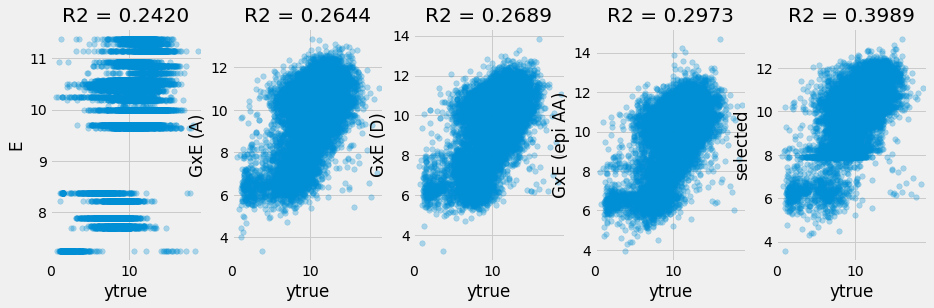

In [47]:
fig, ax = plt.subplots(ncols=5, nrows=1, sharey=False, sharex=True, figsize=(14, 4))
ax = ax.ravel()

df.plot.scatter('ytrue', 'E', alpha=0.3, s=30, ax=ax[0])
ax[0].set_title(f"R2 = {r2_score(df['ytrue'], df['E']):.4f}")

df.plot.scatter('ytrue', 'GxE (A)', alpha=0.3, s=30, ax=ax[1])
ax[1].set_title(f"R2 = {r2_score(df['ytrue'], df['GxE (A)']):.4f}")

df.plot.scatter('ytrue', 'GxE (D)', alpha=0.3, s=30, ax=ax[2])
ax[2].set_title(f"R2 = {r2_score(df['ytrue'], df['GxE (D)']):.4f}")

df.plot.scatter('ytrue', 'GxE (epi AA)', alpha=0.3, s=30, ax=ax[3])
ax[3].set_title(f"R2 = {r2_score(df['ytrue'], df['GxE (epi AA)']):.4f}")

df.plot.scatter('ytrue', 'selected', alpha=0.3, s=30, ax=ax[4])
ax[4].set_title(f"R2 = {r2_score(df['ytrue'], df['selected']):.4f}")
ax[4].set_xlim(0, df['ytrue'].max() + 0.5);

In [48]:
df.corr()

,ytrue,E,G (A+D),GxE (A),GxE (D),GxE (epi AA),GxE (epi DD),GxE (epi AD),GxE (epi all),selected
ytrue,1.000000,0.501073,0.570740,0.539776,0.557981,0.561461,0.538088,0.545362,0.551642,0.640455
E,0.501073,1.000000,0.751201,0.822321,0.839254,0.809925,0.714686,0.730612,0.842459,0.774551
G (A+D),0.570740,0.751201,1.000000,0.890920,0.897835,0.897266,0.945701,0.942804,0.922879,0.915157
GxE (A),0.539776,0.822321,0.890920,1.000000,0.900302,0.933479,0.852404,0.854216,0.914266,0.859618
GxE (D),0.557981,0.839254,0.897835,0.900302,1.000000,0.901466,0.876534,0.883014,0.927842,0.853479
GxE (epi AA),0.561461,0.809925,0.897266,0.933479,0.901466,1.000000,0.855518,0.865432,0.923187,0.889187
GxE (epi DD),0.538088,0.714686,0.945701,0.852404,0.876534,0.855518,1.000000,0.945865,0.900151,0.882531
GxE (epi AD),0.545362,0.730612,0.942804,0.854216,0.883014,0.865432,0.945865,1.000000,0.916746,0.888320
GxE (epi all),0.551642,0.842459,0.922879,0.914266,0.927842,0.923187,0.900151,0.916746,1.000000,0.889009
selected,0.640455,0.774551,0.915157,0.859618,0.853479,0.889187,0.882531,0.888320,0.889009,1.000000


In [49]:
df.drop('ytrue', axis=1).corr().style.background_gradient(axis=None)

,E,G (A+D),GxE (A),GxE (D),GxE (epi AA),GxE (epi DD),GxE (epi AD),GxE (epi all),selected
E,1.000000,0.751201,0.822321,0.839254,0.809925,0.714686,0.730612,0.842459,0.774551
G (A+D),0.751201,1.000000,0.890920,0.897835,0.897266,0.945701,0.942804,0.922879,0.915157
GxE (A),0.822321,0.890920,1.000000,0.900302,0.933479,0.852404,0.854216,0.914266,0.859618
GxE (D),0.839254,0.897835,0.900302,1.000000,0.901466,0.876534,0.883014,0.927842,0.853479
GxE (epi AA),0.809925,0.897266,0.933479,0.901466,1.000000,0.855518,0.865432,0.923187,0.889187
GxE (epi DD),0.714686,0.945701,0.852404,0.876534,0.855518,1.000000,0.945865,0.900151,0.882531
GxE (epi AD),0.730612,0.942804,0.854216,0.883014,0.865432,0.945865,1.000000,0.916746,0.888320
GxE (epi all),0.842459,0.922879,0.914266,0.927842,0.923187,0.900151,0.916746,1.000000,0.889009
selected,0.774551,0.915157,0.859618,0.853479,0.889187,0.882531,0.888320,0.889009,1.000000


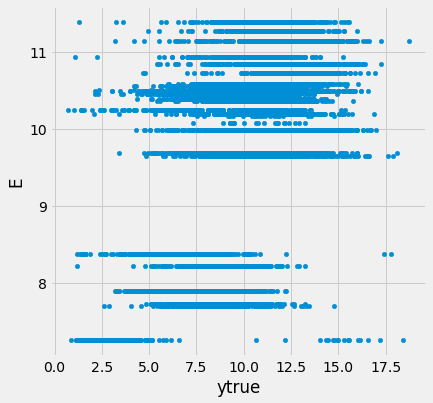

In [50]:
df.plot.scatter('ytrue', 'E');

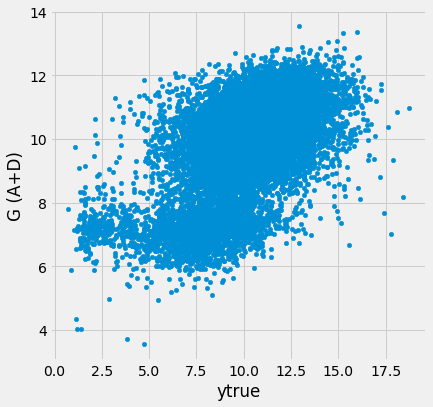

In [51]:
df.plot.scatter('ytrue', 'G (A+D)');